## Features:

     Age | Objective Feature | age | int (days)
     Height | Objective Feature | height | int (cm) |
     Weight | Objective Feature | weight | float (kg) |
     Gender | Objective Feature | gender | categorical code |
     Systolic blood pressure | Examination Feature | ap_hi | int |
     Diastolic blood pressure | Examination Feature | ap_lo | int |
     Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
     Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
     Smoking | Subjective Feature | smoke | binary |
     Alcohol intake | Subjective Feature | alco | binary |
     Physical activity | Subjective Feature | active | binary |
     Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [58]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC ,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression

In [2]:
df = pd.read_csv("cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


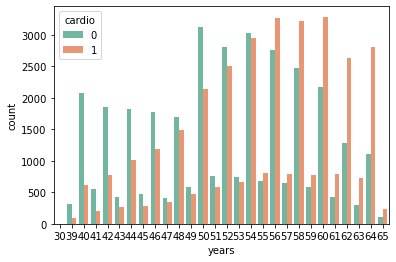

In [8]:

df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");


In [9]:
df.drop("age",axis=1,inplace=True)

In [10]:
#x={"cholesterol","gluc","smoke","alco","alco","active","Cardiovascular Disease dataset.ipynb"}
for i in  df.columns:
    print("columns ",i)
    print(df[i].value_counts())
    print("_________________________________________")

columns  gender
1    45530
2    24470
Name: gender, dtype: int64
_________________________________________
columns  height
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
98        1
99        1
108       1
111       1
96        1
Name: height, Length: 109, dtype: int64
_________________________________________
columns  weight
65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
64.8       1
80.7       1
61.3       1
78.5       1
74.3       1
Name: weight, Length: 287, dtype: int64
_________________________________________
columns  ap_hi
 120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 2000        1
-140         1
 207         1
-150         1
 93          1
Name: ap_hi, Length: 153, dtype: int64
_________________________________________
columns  ap_lo
80      34847
90      14316
70      10245
100      4082
60       2727
        ...  
1007        1
8044        1
8500        1
880         1
7100  

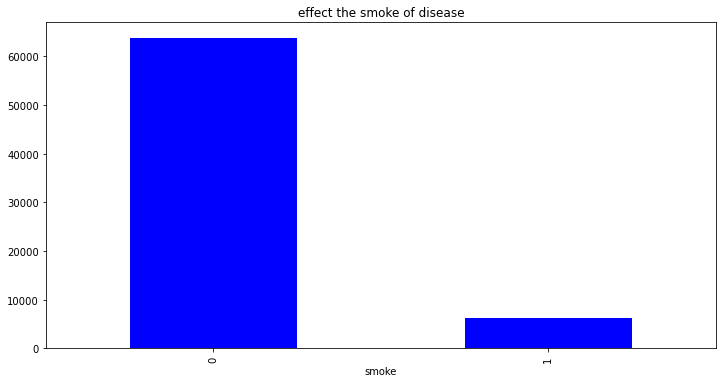

In [11]:
df.groupby(df.smoke).count()["cardio"].plot(kind='bar',title="effect the smoke of disease",figsize = (12, 6), color='blue')
plt.show()

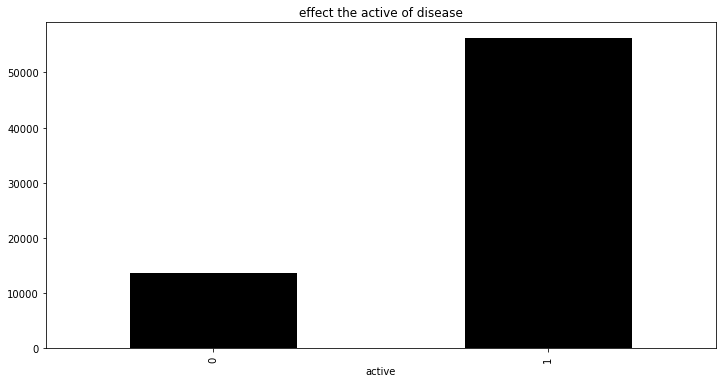

In [12]:
df.groupby(df.active).count()["cardio"].plot(kind='bar',title="effect the active of disease",figsize = (12, 6), color='black')
plt.show()

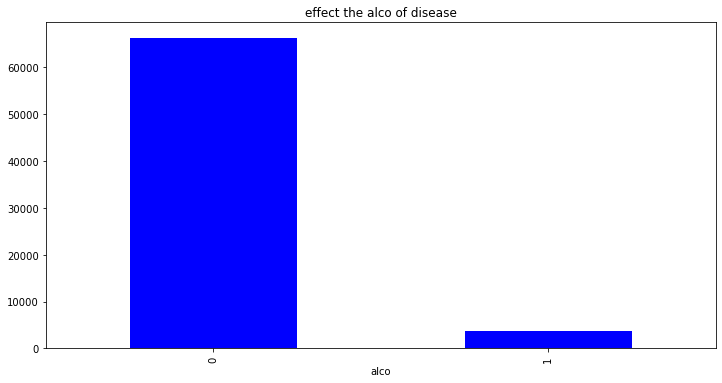

In [13]:
df.groupby(df.alco).count()["cardio"].plot(kind='bar',title="effect the alco of disease",figsize = (12, 6), color='blue')
plt.show()

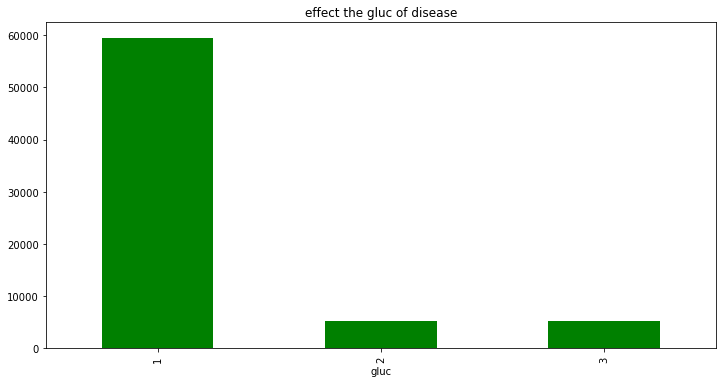

In [14]:
df.groupby(df.gluc).count()["cardio"].plot(kind='bar',title="effect the gluc of disease",figsize = (12, 6), color='green')
plt.show()

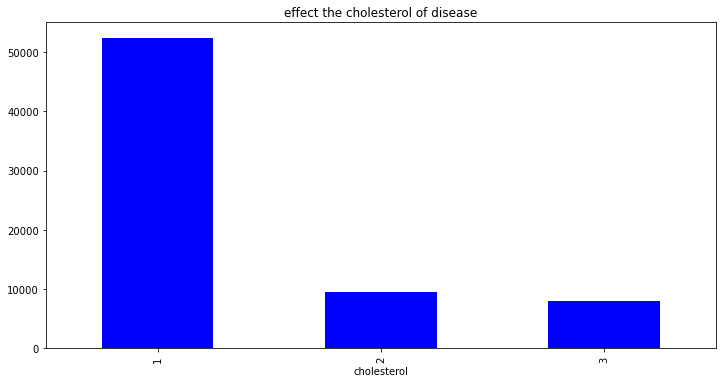

In [15]:
df.groupby(df.cholesterol).count()["cardio"].plot(kind='bar',title="effect the cholesterol of disease",figsize = (12, 6), color='blue')
plt.show()

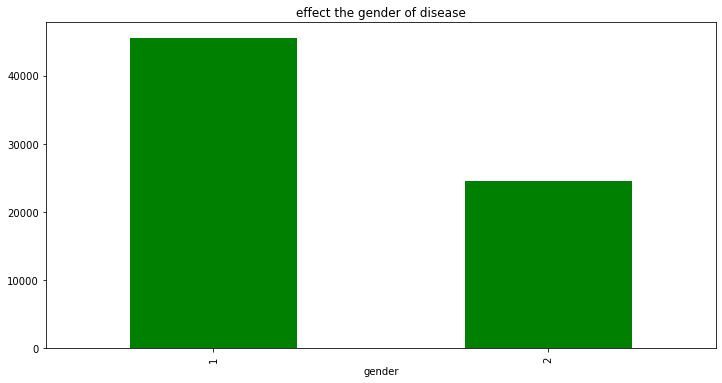

In [16]:
df.groupby(df.gender).count()["cardio"].plot(kind='bar',title="effect the gender of disease",figsize = (12, 6), color='green')
plt.show()

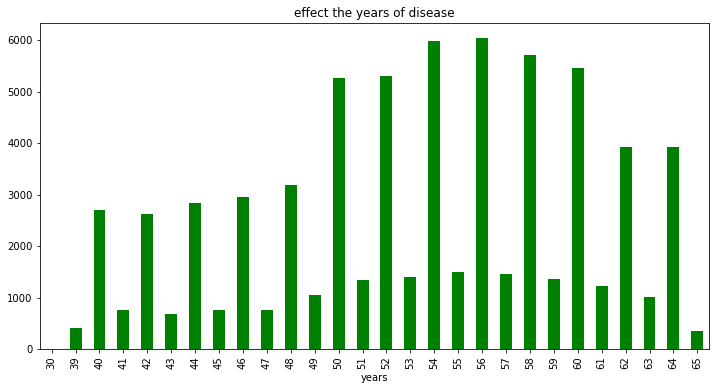

In [17]:
df.groupby(df.years).count()["cardio"].plot(kind='bar',title="effect the years of disease",figsize = (12, 6), color='green')
plt.show()

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.



<AxesSubplot:xlabel='gender', ylabel='count'>

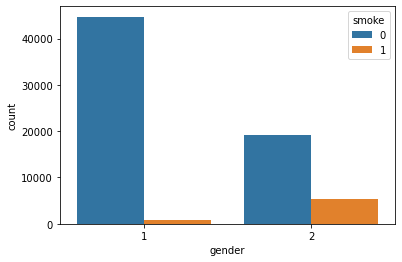

In [18]:
sns.countplot(x="gender",hue="smoke",data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

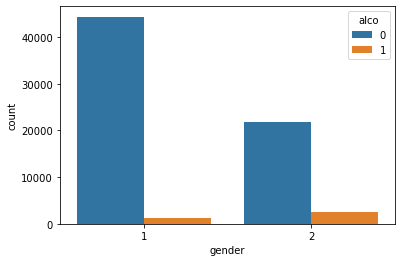

In [19]:
sns.countplot(x="gender",hue="alco",data=df)

<AxesSubplot:xlabel='smoke', ylabel='count'>

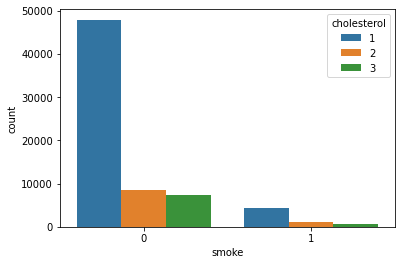

In [20]:
sns.countplot(x="smoke",hue="cholesterol",data=df)

In [21]:
df.sample()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
61323,1,163,72.0,120,80,1,1,0,0,1,1,64


<AxesSubplot:>

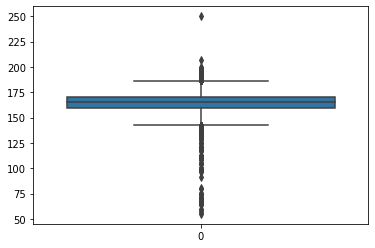

In [22]:
sns.boxplot(data=df.height)

<AxesSubplot:>

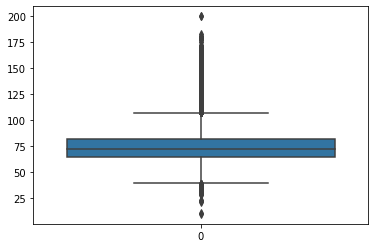

In [23]:
sns.boxplot(data=df.weight)

<AxesSubplot:>

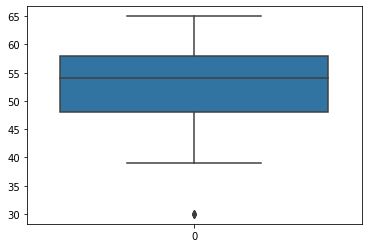

In [24]:
sns.boxplot(data=df.years)

<AxesSubplot:ylabel='ap_lo'>

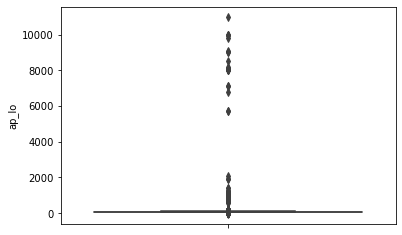

In [25]:
sns.boxplot(y=df.ap_lo)

In [26]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

<AxesSubplot:>

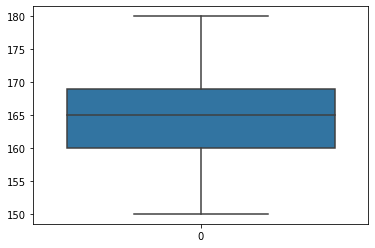

In [27]:
sns.boxplot(data=df.height)

<AxesSubplot:>

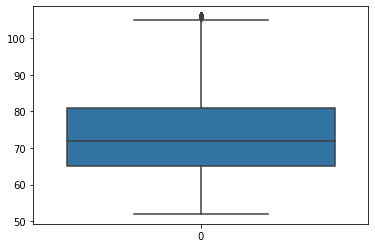

In [28]:
sns.boxplot(data=df.weight)

In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure?



In [29]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))


Diastilic pressure is higher than systolic one in 1082 cases


In [30]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

<AxesSubplot:ylabel='ap_lo'>

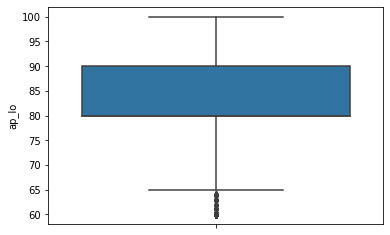

In [31]:
sns.boxplot(y=df.ap_lo)

<AxesSubplot:ylabel='ap_hi'>

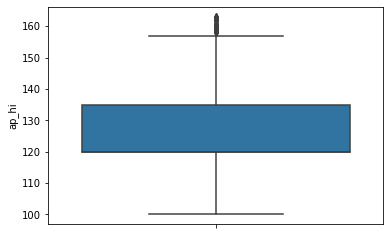

In [32]:
sns.boxplot(y=df.ap_hi)

In [33]:
df.shape

(60142, 12)

# model

In [34]:
x =df.drop("cardio",axis=1)
y=df.cardio

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44)


In [36]:
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [63]:
svcmodel=SVC()
svcmodel.fit(X_train,y_train)
svcmodel.score(X_train, y_train)
y_pred = svcmodel.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7252


In [51]:
dtmodel=DecisionTreeClassifier(max_depth=5)
dtmodel.fit(X_train,y_train)
dtmodel.score(X_train, y_train)
y_pred = dtmodel.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7252
